In [48]:
from pathlib import Path
from PIL import Image
import pillow_heif
import cv2
import numpy as np
import viser
import sys
import time
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

print(sys.executable)

/opt/anaconda3/envs/project3/bin/python


In [49]:

# Register HEIF/HEIC support for Pillow
pillow_heif.register_heif_opener()

# Define the folder containing your images
input_folder = Path("./NEW-sf-images-heic")  # current directory
output_folder = Path("./NEW-sf-JPG")
output_folder.mkdir(exist_ok=True)

# Loop through all HEIC/HEIF files (case-insensitive)
heic_files = list(input_folder.glob("*.HEIC")) + list(input_folder.glob("*.heic")) + list(input_folder.glob("*.heif"))
if not heic_files:
    print("No HEIC/HEIF files found in this folder.")
else:
    for img_path in heic_files:
        try:
            img = Image.open(img_path)
            rgb_img = img.convert("RGB")
            out_path = output_folder / (img_path.stem + ".JPG")
            rgb_img.save(out_path, "JPEG", quality=95)
            print(f"✅ Converted {img_path.name} → {out_path.name}")
        except Exception as e:
            print(f"⚠️ Failed to convert {img_path.name}: {e}")

    print("\n🎉 Done! All JPGs saved in:", output_folder.resolve())


✅ Converted IMG_3811.HEIC → IMG_3811.JPG
✅ Converted IMG_3779.HEIC → IMG_3779.JPG
✅ Converted IMG_3796.HEIC → IMG_3796.JPG
✅ Converted IMG_3780.HEIC → IMG_3780.JPG
✅ Converted IMG_3807.HEIC → IMG_3807.JPG
✅ Converted IMG_3827.HEIC → IMG_3827.JPG
✅ Converted IMG_3826.HEIC → IMG_3826.JPG
✅ Converted IMG_3806.HEIC → IMG_3806.JPG
✅ Converted IMG_3781.HEIC → IMG_3781.JPG
✅ Converted IMG_3797.HEIC → IMG_3797.JPG
✅ Converted IMG_3810.HEIC → IMG_3810.JPG
✅ Converted IMG_3821.HEIC → IMG_3821.JPG
✅ Converted IMG_3817.HEIC → IMG_3817.JPG
✅ Converted IMG_3790.HEIC → IMG_3790.JPG
✅ Converted IMG_3786.HEIC → IMG_3786.JPG
✅ Converted IMG_3801.HEIC → IMG_3801.JPG
✅ Converted IMG_3800.HEIC → IMG_3800.JPG
✅ Converted IMG_3787.HEIC → IMG_3787.JPG
✅ Converted IMG_3791.HEIC → IMG_3791.JPG
✅ Converted IMG_3816.HEIC → IMG_3816.JPG
✅ Converted IMG_3820.HEIC → IMG_3820.JPG
✅ Converted IMG_3823.HEIC → IMG_3823.JPG
✅ Converted IMG_3788.HEIC → IMG_3788.JPG
✅ Converted IMG_3819.HEIC → IMG_3819.JPG
✅ Converted IMG_

(5712, 4284, 3)
(357, 268, 3)


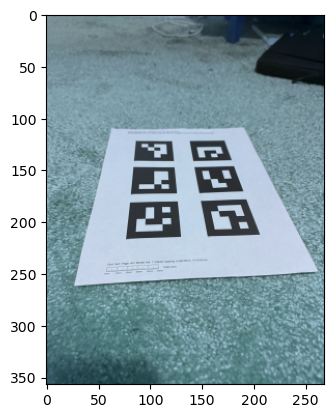

In [50]:
DOWNSAMPLE_SCALE = 1/16
random_img_path = Path("./aruco-tags-JPG/IMG_3682.JPG")
random_img = cv2.imread(random_img_path)
print(random_img.shape)
downsampled_img = cv2.resize(
        random_img, 
        (0, 0), # Use (0,0) when specifying fx and fy
        fx=DOWNSAMPLE_SCALE, 
        fy=DOWNSAMPLE_SCALE, 
        interpolation=cv2.INTER_AREA
    )
print(downsampled_img.shape)
plt.imshow(downsampled_img)

# Part 0
## Part 0.1

In [51]:
DOWNSAMPLE_SCALE = 1/16

# Create ArUco dictionary and detector parameters (4x4 tags)
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_50)
aruco_params = cv2.aruco.DetectorParameters()

In [52]:
folder = Path("./aruco-tags-JPG") 
image_paths = list(folder.glob("*.JPG"))  # only JPGs

marker_size = .060  # 60 mm
marker_spacing_h = .090  # 90 mm
marker_spacing_v = .07567  # 75.67 mm

# Suppose grid is 3x2: rows=3, cols=2
#0 1 
#2 3 
#4 5

rows, cols = 3, 2
real_origin_corners = {}
for r in range(rows):
    for c in range(cols):
        idx = r*cols + c
        x0 = c * marker_spacing_h
        y0 = r * marker_spacing_v
        real_origin_corners[idx] = np.array([
            [x0, y0, 0],
            [x0 + marker_size, y0, 0],
            [x0 + marker_size, y0 + marker_size, 0],
            [x0, y0 + marker_size, 0]
        ], dtype=np.float32)




In [53]:
imgpoints = []
objpoints = []
img_shown = False

for img_path in image_paths:
    img = cv2.imread(str(img_path))
    downsampled_img = cv2.resize(
        img, 
        (0, 0), # Use (0,0) when specifying fx and fy
        fx=DOWNSAMPLE_SCALE, 
        fy=DOWNSAMPLE_SCALE, 
        interpolation=cv2.INTER_AREA
    )
    #print(img_path)
    corners, ids, _ = cv2.aruco.detectMarkers(downsampled_img, aruco_dict, parameters=aruco_params)
    if ids is not None:
        
        # Collect all 2D–3D correspondences for this image
        img_pts_all = []
        obj_pts_all = []

        for i, id in enumerate(ids.flatten()):
            img_pts = corners[i].reshape(4, 2).astype(np.float32)
            #print(id)
            obj_pts = real_origin_corners[id].reshape(4, 3).astype(np.float32)
            
            img_pts_all.append(img_pts)  # Shape: (4, 2)
            obj_pts_all.append(obj_pts)  # Shape: (4, 3)""" # use this for images x 24 x 2

            #imgpoints.append(img_pts)  # Shape: (4, 2)
            #objpoints.append(obj_pts)  # Shape: (4, 3)

        #print(img_pts_all)
        imgpoints.append(np.concatenate(img_pts_all, axis=0).astype(np.float32))
        objpoints.append(np.concatenate(obj_pts_all, axis=0).astype(np.float32))
        

    else:
        pass



In [ ]:
#print(imgpoints)
#print(objpoints)
#imgpoints = np.array(imgpoints)
#objpoints = np.array(objpoints) --> super unecessary step
#imgpoints = imgpoints.reshape(-1, 4, 2)
#objpoints = objpoints.reshape(-1, 4, 3)
print(imgpoints.shape)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (38,) + inhomogeneous part.

In [54]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
downsampled_img = cv2.resize(
        gray, 
        (0, 0), # Use (0,0) when specifying fx and fy
        fx=DOWNSAMPLE_SCALE, 
        fy=DOWNSAMPLE_SCALE, 
        interpolation=cv2.INTER_AREA
    )
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, downsampled_img.shape[::-1], None, None)  

In [55]:
print("Reprojection error:", ret)
print("distortion ", dist)

Reprojection error: 0.6934847027867747
distortion  [[ 0.16320118 -0.55165631 -0.01289736 -0.00196943  0.50068057]]


In [9]:
print(mtx)

[[504.10018622   0.         269.61130277]
 [  0.         514.28926177 360.17183242]
 [  0.           0.           1.        ]]


# lets downsample our images

In [56]:
# Output folder
input_folder = Path("./NEW-sf-JPG")
image_paths = list(input_folder.glob("*.JPG"))
output_folder = Path("./NEW-sf-downsampled")
output_folder.mkdir(exist_ok=True)
all_downsampled_imgs = []
DOWNSAMPLE_SCALE = 1/16  # example

for img_path in image_paths:
    # Load image
    img = cv2.imread(str(img_path))
    if img is None:
        print(f"Warning: Failed to read {img_path}")
        continue

    # Downsample
    downsampled_img = cv2.resize(
        img,
        (0, 0),
        fx=DOWNSAMPLE_SCALE,
        fy=DOWNSAMPLE_SCALE,
        interpolation=cv2.INTER_AREA,
    )
    all_downsampled_imgs.append(downsampled_img)
    # Save to output folder with same filename
    out_name = img_path.stem + "_downsampled" + img_path.suffix
    out_path = output_folder / out_name
    cv2.imwrite(str(out_path), downsampled_img)

    print(f"Saved: {out_path}")

Saved: NEW-sf-downsampled/IMG_3783_downsampled.JPG
Saved: NEW-sf-downsampled/IMG_3797_downsampled.JPG
Saved: NEW-sf-downsampled/IMG_3813_downsampled.JPG
Saved: NEW-sf-downsampled/IMG_3807_downsampled.JPG
Saved: NEW-sf-downsampled/IMG_3806_downsampled.JPG
Saved: NEW-sf-downsampled/IMG_3812_downsampled.JPG
Saved: NEW-sf-downsampled/IMG_3796_downsampled.JPG
Saved: NEW-sf-downsampled/IMG_3782_downsampled.JPG
Saved: NEW-sf-downsampled/IMG_3794_downsampled.JPG
Saved: NEW-sf-downsampled/IMG_3780_downsampled.JPG
Saved: NEW-sf-downsampled/IMG_3804_downsampled.JPG
Saved: NEW-sf-downsampled/IMG_3810_downsampled.JPG
Saved: NEW-sf-downsampled/IMG_3811_downsampled.JPG
Saved: NEW-sf-downsampled/IMG_3805_downsampled.JPG
Saved: NEW-sf-downsampled/IMG_3781_downsampled.JPG
Saved: NEW-sf-downsampled/IMG_3795_downsampled.JPG
Saved: NEW-sf-downsampled/IMG_3791_downsampled.JPG
Saved: NEW-sf-downsampled/IMG_3785_downsampled.JPG
Saved: NEW-sf-downsampled/IMG_3801_downsampled.JPG
Saved: NEW-sf-downsampled/IMG_3

## Part 0.3

this is if your loading in images

In [57]:
folder = Path("./NEW-sf-downsampled") 
image_paths = list(folder.glob("*.JPG")) 
marker_size = 0.08
world_cords = [(0,0,0), (marker_size, 0, 0), (marker_size, marker_size,0), (0, marker_size, 0)]
objectPoints = []
imagePoints = []
final_image_paths = []
for img_path in image_paths:
    img = cv2.imread(str(img_path))

    corners, ids, _ = cv2.aruco.detectMarkers(img, aruco_dict, parameters=aruco_params)
    #print(corners)
    if ids is not None:

        # Collect all 2D–3D correspondences for this image
        objectPoints.append(world_cords)
        #print(corners)
        imagePoints.append(corners[0][0])
        final_image_paths.append(img_path)

    else:
        pass
objectPoints = np.array(objectPoints, dtype=np.float32)
imagePoints = np.array(imagePoints, dtype=np.float32)



In [58]:
print(objectPoints.shape)

(50, 4, 3)


In [59]:
def create_c2w(objectPoints, imagePoints, mtx, dist):
    success, rvec, tvec = cv2.solvePnP(objectPoints, imagePoints, mtx, dist)
    rotation = cv2.Rodrigues(rvec)[0]
    w2c = np.eye(4, dtype=np.float32)
    w2c[:3, :3] = rotation
    w2c[:3, 3] = tvec.flatten()
    c2w = np.linalg.inv(w2c)
    return c2w

In [60]:

all_c2w = []
for i, img_path in enumerate(final_image_paths):
    img = cv2.imread(str(img_path))
    H, W = img.shape[:2]
    c2w = create_c2w(objectPoints[i], imagePoints[i], mtx, dist)
    all_c2w.append(c2w)
    


In [62]:
server = viser.ViserServer(share=True)


for i, img_path in enumerate(final_image_paths):
    img = cv2.imread(str(img_path))
    H, W = img.shape[:2]

    server.scene.add_camera_frustum(
        f"/cameras/{i}",  # unique name
        fov=2 * np.arctan2(H / 2, mtx[0, 0]),  # horizontal FOV
        aspect=W / H,
        scale=0.03,
        wxyz=viser.transforms.SO3.from_matrix(all_c2w[i][:3, :3]).wxyz,  # rotation as quaternion
        position=all_c2w[i][:3, 3],  # camera position
        image=img[:,:,::-1]
    )
    print("Added all camera frustums!")

while True:
    time.sleep(0.1)

╭────── viser (listening *:8084) ───────╮
│             ╷                         │
│   HTTP      │ http://localhost:8084   │
│   Websocket │ ws://localhost:8084     │
│             ╵                         │
╰───────────────────────────────────────╯

(viser) Share URL requested!

(viser) Generated share URL (expires in 24 hours, max 16 clients): https://c-prime.share.viser.studio

Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
Added all camera frustums!
A

(viser) Connection opened (0, 1 total), 206 persistent messages

(viser) Connection closed (0, 0 total)

(viser) Disconnected from share URL

KeyboardInterrupt: 

In [63]:
print(all_c2w)

[array([[-0.48446313, -0.45879963,  0.7448479 , -0.18438299],
       [ 0.87478   , -0.24682449,  0.4169384 , -0.02675444],
       [-0.00744448,  0.85356927,  0.5209261 , -0.21849136],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), array([[ 0.8339723 , -0.3736449 ,  0.40605384, -0.1234616 ],
       [ 0.5515723 ,  0.58589697, -0.59371096,  0.30826798],
       [-0.01606863,  0.71910655,  0.694714  , -0.3495745 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), array([[-0.42009807,  0.5031322 , -0.75523216,  0.28772143],
       [-0.9074266 , -0.24182029,  0.34365672,  0.02595417],
       [-0.00972569,  0.82968724,  0.5581438 , -0.26464805],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), array([[-0.01410298, -0.6506787 ,  0.7592222 , -0.19831629],
       [ 0.999695  , -0.02457036, -0.00248773,  0.07100488],
       [ 0.02027308,  0.7589556 ,  0.65082675, -0.25856853],
       [ 0.    

## Part 0.4

In [64]:
# Define the downsampling scale factor
# A factor of 0.5 means half the width and half the height.
DOWNSAMPLE_SCALE = 1/16

#output_folder = Path("./undistorted-lafufu")
#output_folder.mkdir(exist_ok=True) 

all_images = []

print(f"Starting undistortion and downsampling by a factor of {DOWNSAMPLE_SCALE}...")
new_camera_matrix = None
for img_path in final_image_paths:
    img = cv2.imread(str(img_path))
    

    h, w = img.shape[:2]
    # 1. Undistort the image

    newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 0, (w,h))
    undistorted_img = cv2.undistort(downsampled_img, mtx, dist, None, newcameramtx)
    x, y, w, h = roi
    undistorted_img = undistorted_img[y:y+h, x:x+w]
    newcameramtx[0, 2] -= x  # cx
    newcameramtx[1, 2] -= y  # cy
    new_camera_matrix = newcameramtx
    # 2. Downsample the undistorted image
    # cv2.INTER_AREA is generally recommended for downsampling as it avoids Moiré effects.
    
    #new_camera_matrix = newcameramtx
    # Append the final downsampled image to the list
    all_images.append(img)
    
    # 3. Save the downsampled image
    #out_path = output_folder / (img_path.stem + f"_undistorted.jpg")
    #success = cv2.imwrite(str(out_path), undistorted_img)
    
    #if success:
    #    print(f"✅ Saved {out_path.name} (Original size: {img.shape[1]}x{img.shape[0]}, New size: {downsampled_img.shape[1]}x{downsampled_img.shape[0]})")
    #else:
    #    print(f"⚠️ Failed to save {out_path.name}")


Starting undistortion and downsampling by a factor of 0.0625...


In [65]:
print(np.array(all_images).shape)
print(np.array(all_c2w).shape)

(50, 357, 268, 3)
(50, 4, 4)


In [66]:
print(mtx)

[[254.35295663   0.         130.97524006]
 [  0.         260.01217519 175.63759348]
 [  0.           0.           1.        ]]


In [67]:
print(new_camera_matrix)

[[261.95248489   0.         130.54109278]
 [  0.         264.58092542 171.19730373]
 [  0.           0.           1.        ]]


Step 0.4
now that we have all of our undistorted lafufu images: 

In [68]:
images_train, images_val,  c2ws_train, c2ws_val = train_test_split(np.array(all_images), np.array(all_c2w), test_size=0.1, random_state=189)
#images_val, images_test, c2ws_val, c2ws_test = train_test_split(images_test_val, c2ws_test_val, test_size=0.1, random_state=189)

In [69]:
np.savez(
    'NEW-lego-16.npz',
    images_train=images_train,    # (N_train, H, W, 3)
    c2ws_train=c2ws_train,        # (N_train, 4, 4)
    images_val=images_val,        # (N_val, H, W, 3)
    c2ws_val=c2ws_val,            # (N_val, 4, 4)
    #c2ws_test=c2ws_test,          # (N_test, 4, 4)
    focal=mtx[0][0],                   # float
    K = mtx
)

# Part 1

In [70]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import imageio.v3 as iio   

import math

(5712, 4284, 3)
(952, 714, 3)


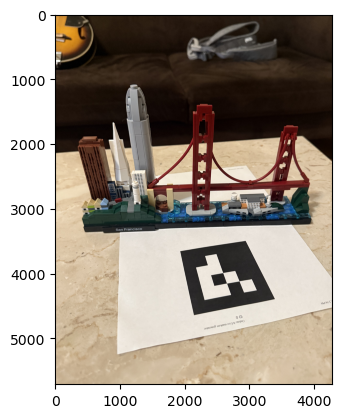

In [79]:
#time to import the image?
y = cv2.imread('./NEW-sf-JPG/IMG_3779.JPG')
#y = cv2.imread('./foxy_boi.jpg')
#and do sinusoidal encoding?
plt.imshow(y[:,:, ::-1])
print(y.shape)
downsampled_img = cv2.resize(
        y,
        (0, 0),
        fx=1/6,
        fy=1/6,
        interpolation=cv2.INTER_AREA,
)
print(downsampled_img.shape)

In [24]:
def PE(original_position_x_y, L):
    #maps a coordinate (x, y) to its positional encoding
    positional_encoding = [original_position_x_y[0], original_position_x_y[1]]
    for l in range(L):
        positional_encoding.append(math.sin(2**(l)*math.pi*original_position_x_y[0]))
        positional_encoding.append(math.cos(2**(l)*math.pi*original_position_x_y[0]))
        positional_encoding.append(math.sin(2**(l)*math.pi*original_position_x_y[1]))
        positional_encoding.append(math.cos(2**(l)*math.pi*original_position_x_y[1]))
    return positional_encoding

print(len(PE([.265, .3], 10)))

42


In [30]:

def dataLoader(img, N):
    #lets get the dimensions of the img 
    H, W = img.shape[0], img.shape[1]
    #lets sample random points from our input
    ys, xs = np.meshgrid(np.arange(H), np.arange(W), indexing='ij')
    coords = np.stack([xs.ravel(), ys.ravel()], axis=-1)  # shape (H*W, 2)
    
    # sample N points without replacement
    indices = np.random.choice(coords.shape[0], size=N, replace=False)
    sampled_coords = coords[indices]  # shape (N, 2)
    
    # normalize coordinates to [0,1] for positional encoding
    
    #
    colors = img[sampled_coords[:, 1], sampled_coords[:, 0]]
    
    #lets rescale everything
    sampled_coords = sampled_coords.astype(np.float32)
    sampled_coords[:, 0] /= W
    sampled_coords[:, 1] /= H
    colors = colors.astype(np.float32)
    colors /= 255
    return sampled_coords, colors


    

In [33]:
pts, colors = dataLoader(y, 1000)
print(colors)

[[0.30980393 0.5294118  0.74509805]
 [0.3254902  0.4392157  0.56078434]
 [0.46666667 0.54901963 0.5411765 ]
 ...
 [0.09019608 0.1764706  0.15686275]
 [0.08627451 0.1882353  0.16470589]
 [0.0627451  0.07058824 0.07058824]]


In [277]:
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
print("Using device:", device)


Using device: mps


In [74]:
L = 10
loss_fn = nn.MSELoss()

num_epochs = 1000
batchSize = 10000

model = nn.Sequential(
    nn.Linear(L * 4 +2, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 3),
    nn.Sigmoid()
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

error = {'epoch': [], 'mse': [], 'psnr': []}
predicted_images = []

##Lets create a blank canvas so we can send it through on every 100th epoch to see how 
#its performing
H, W = y.shape[0], y.shape[1]  
ys, xs = np.meshgrid(np.arange(H), np.arange(W), indexing='ij')
coords = np.stack([xs.ravel(), ys.ravel()], axis=-1)  # shape (H*W, 2)

# Normalize coordinates to [0,1]
coords = coords.astype(np.float32)
coords[:, 0] /= W
coords[:, 1] /= H
total_encoded_points = [PE(point, L) for point in coords]
coords_tensor = torch.tensor(total_encoded_points).to(device)

for n in range(num_epochs):
    #sample n points
    points, colors = dataLoader(y, batchSize)
    #do positional encoding
    encoded_points = [PE(point, L) for point in points]
    #put into 
    X_tensor = torch.tensor(encoded_points, dtype=torch.float32, device=device)
    y_tensor = torch.tensor(colors, dtype=torch.float32, device=device)
    y_pred = model(X_tensor)
    loss = loss_fn(y_pred, y_tensor)

    psnr = 10 * math.log10(1/loss.item())
    error['epoch'].append(n)
    error['mse'].append(loss.item())
    error['psnr'].append(psnr)
    
    
    if n % 100 == 0: #at every 100th iteration, lets visualize how our model is performing
        with torch.no_grad():  # we don't need gradients for inference
            y_pred = model(coords_tensor)  # shape (H*W, 3)
        y_pred_np = y_pred.cpu().numpy()  # move to CPU
        img_pred = y_pred_np.reshape(H, W, 3)  # shape (H, W, 3)
        img_pred = np.clip(img_pred, 0, 1) 
        predicted_images.append(img_pred)
        print(n)   


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0
100
200
300
400
500
600
700
800
900


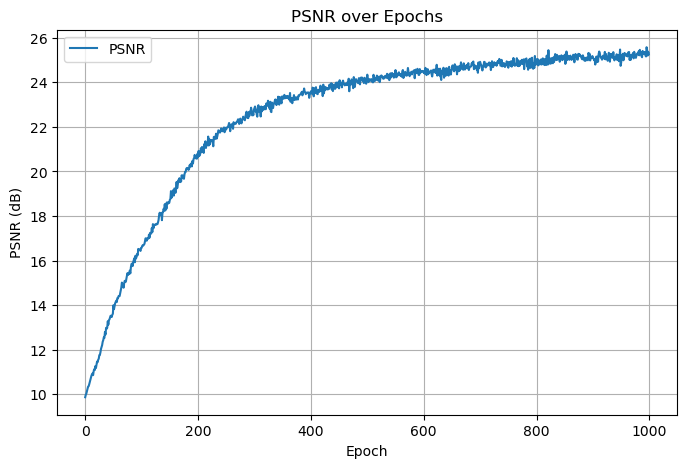

In [75]:
plt.figure(figsize=(8,5))
plt.plot(error['epoch'], error['psnr'], label='PSNR')
plt.xlabel('Epoch')
plt.ylabel('PSNR (dB)')
plt.title('PSNR over Epochs')
plt.grid(True)
plt.legend()
plt.show()

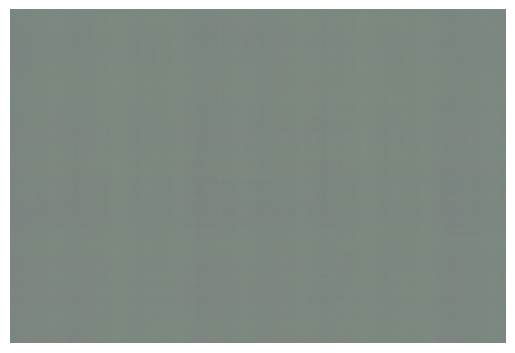

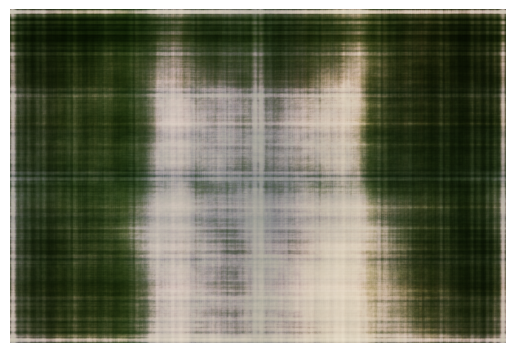

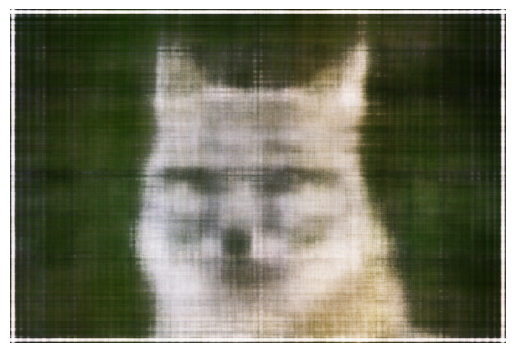

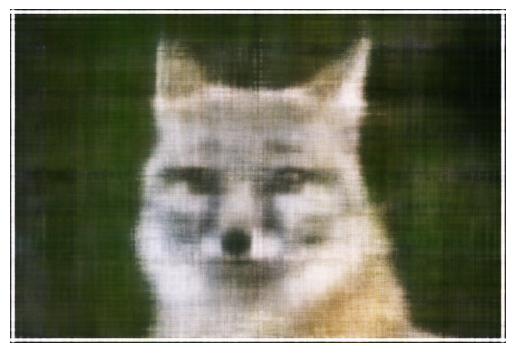

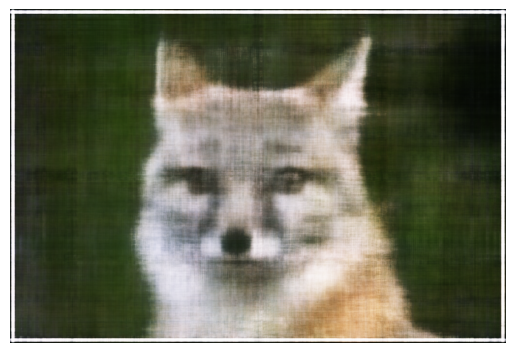

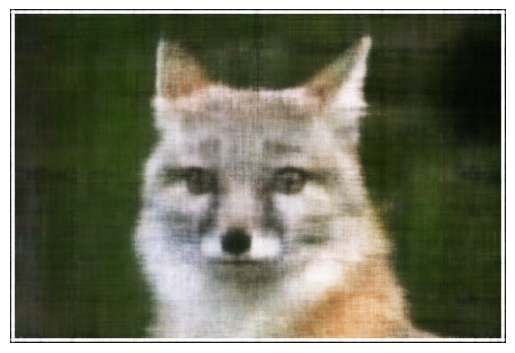

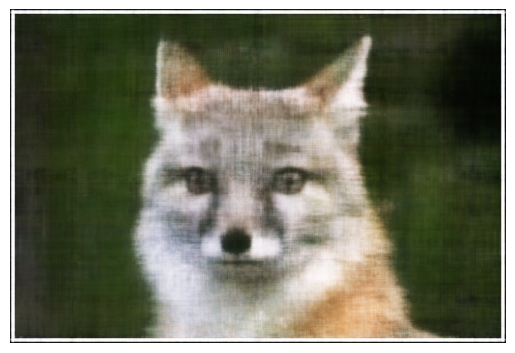

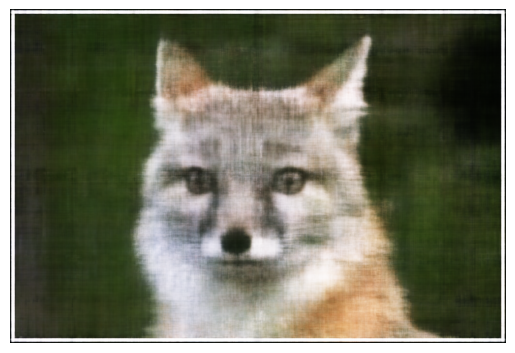

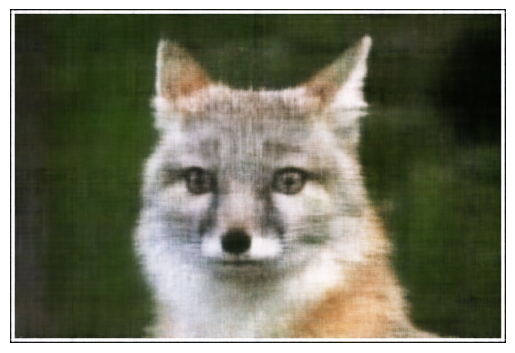

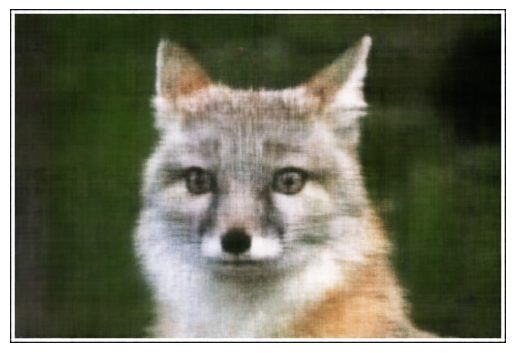

In [76]:
for img_pred in predicted_images:
    plt.imshow(img_pred[:,:,::-1])
    plt.axis('off')
    plt.show()

# Part 2

In [85]:
data = np.load(f"lego_200x200.npz")

# Training images: [100, 200, 200, 3]
images_train = data["images_train"] / 255.0

# Cameras for the training images 
# (camera-to-world transformation matrix): [100, 4, 4]
c2ws_train = data["c2ws_train"]

# Validation images: 
images_val = data["images_val"] / 255.0

# Cameras for the validation images: [10, 4, 4]
# (camera-to-world transformation matrix): [10, 200, 200, 3]
c2ws_val = data["c2ws_val"]

# Test cameras for novel-view video rendering: 
# (camera-to-world transformation matrix): [60, 4, 4]
c2ws_test = data["c2ws_test"]

# Camera focal length
focal = data["focal"]  # float

In [86]:
print(c2ws_test.shape)

(60, 4, 4)


In [87]:
def transform(c2w, camera_coords):
    #camera coords expects (4, )
    return c2w @ camera_coords


In [88]:
def pixel_to_camera(K, uv, scale):
    k_inv = np.linalg.inv(K)
    camera_coords = scale * (k_inv @ uv)
    camera_coords_h = np.append(camera_coords, 1)
    return camera_coords_h



In [89]:
def pixel_to_ray(K, c2w, uv):
    r_o = c2w[:3, 3] # this is a vec of length 3
    camera_cords = pixel_to_camera(K, uv, 1)
    world_cords = transform(c2w, camera_cords)
    r_d = (world_cords[:3] - r_o)/(np.linalg.norm(world_cords[:3] - r_o))
    return r_o, r_d



Note to self, should do some sanity checking here to make sure everything is actually working

# 2.2 Sampling

In [90]:
def samplingRaysFromImg(img, K, c2w, rays_to_sample):
    H, W = img.shape[:2]
    r_os = []
    r_ds = []
    pixels = []
    for _ in range(rays_to_sample):
        u = np.random.randint(0, W)
        v = np.random.randint(0, H)
        uv = [u+0.5, v+0.5, 1] 
        r_o, r_d = pixel_to_ray(K, c2w, uv)
        pixel = img[v, u]

        r_os.append(r_o)
        r_ds.append(r_d)
        pixels.append(pixel)
    return r_os, r_ds, pixels


In [91]:
def samplingPointsFromRays(r_o, r_d, near = 2.0, far=6.0, n_samples=64, perturb=True):
    """t = np.linspace(near, far, n_samples)
    t_width = (far - near) / n_samples
    t = t + (np.random.rand(t.shape[0]) * t_width)  # <-- fix here
    x = r_o + r_d * t[:, None]  # make sure broadcasting works (t[:,None] for 3D)"""
    
    t_edges = np.linspace(near, far, n_samples + 1)
    
    if perturb:
        # sample inside each interval
        t = t_edges[:-1] + np.random.rand(n_samples) * (t_edges[1:] - t_edges[:-1])
    else:
        # center of each interval
        t = 0.5 * (t_edges[:-1] + t_edges[1:])
    
    x = r_o + r_d * t[:, None]

    return x

In [92]:
def sample_along_rays(r_os, r_ds, random=True):
    return np.array([samplingPointsFromRays(ray_0, ray_d) for ray_0, ray_d in zip(r_os, r_ds)])

# Part 2.3

In [93]:
class RaysData:
    def __init__(self, images, K, c2ws, index_to_render=0, near=2.0, far=6.0):
        """
        images: (N, H, W, 3) RGB images
        K: (3, 3) camera intrinsics
        c2ws: (N, 4, 4) camera-to-world matrices
        """
        self.images = images
        self.K = K
        self.c2ws = c2ws
        self.near = near
        self.far = far
        self.H, self.W = images.shape[1:3]
        self.M = len(images)

        #make the pixel grid
        u, v = np.meshgrid(np.arange(self.W), np.arange(self.H))  # shape (H, W)
        uvs = np.stack([u, v], axis=-1)  # shape (H, W, 2)
        self.uvs = uvs.reshape(-1, 2)         # flatten to (H*W, 2)

        #grab the pixel values from the 0th image
        self.pixels = images_train[index_to_render, self.uvs[:,1], self.uvs[:,0]]
        
        r_os = []
        r_ds = []
        for v in range(self.H):
            for u in range(self.W):
                uv = [u + 0.5, v + 0.5, 1]  # homogeneous coordinates
                r_o, r_d = pixel_to_ray(self.K, self.c2ws[index_to_render], uv)
                r_os.append(r_o)
                r_ds.append(r_d)


        self.rays_o = np.array(r_os)
        self.rays_d = np.array(r_ds)  # (H*W, 3)


        
    
    def sampleRays(self, N):
        rays_to_sample = N // self.M
        indices = np.random.randint(0, len(self.images), size = self.M)
        total_r_os =[]
        total_rds = []
        total_pixels = []
        for idx in indices:
            r_os, r_ds, pixels = samplingRaysFromImg(self.images[idx], self.K, self.c2ws[idx], rays_to_sample)
            total_r_os.append(r_os)
            total_rds.append(r_ds)
            total_pixels.append(pixels)
        total_r_os = np.concatenate(total_r_os, axis=0)  # shape (N,3)
        total_rds = np.concatenate(total_rds, axis=0)  # shape (N,3)
        total_pixels = np.concatenate(total_pixels, axis=0)  # shape (N,3)

        return total_r_os, total_rds, total_pixels

        

        
        
        #sample rays from the image
        


In [12]:
H, W = images_train.shape[1:3]
K = np.array([
        [focal, 0, W/2],
        [0, focal, H/2],
        [0, 0, 1]
    ], dtype=np.float32)

dataset = RaysData(images_train, K, c2ws_train)
rays_o, rays_d, pixels = dataset.sampleRays(100)
points = sample_along_rays(rays_o, rays_d)
print(rays_o.shape)

(100, 3)


In [94]:
server = viser.ViserServer(share=True)
for i, (image, c2w) in enumerate(zip(images_train, c2ws_train)):
    server.add_camera_frustum(
        f"/cameras/{i}",
        fov=2 * np.arctan2(H / 2, K[0, 0]),
        aspect=W / H,
        scale=0.15,
        wxyz=viser.transforms.SO3.from_matrix(c2w[:3, :3]).wxyz,
        position=c2w[:3, 3],
        image=image
    )
for i, (o, d) in enumerate(zip(rays_o, rays_d)):
    server.add_spline_catmull_rom(
        f"/rays/{i}", positions=np.stack((o, o + d * 6.0)),
    )
server.add_point_cloud(
    f"/samples",
    colors=np.zeros_like(points).reshape(-1, 3),
    points=points.reshape(-1, 3),
    point_size=0.02,
)

while True:
    time.sleep(0.1)  # Wait to allow visualization to run

╭────── viser (listening *:8081) ───────╮
│             ╷                         │
│   HTTP      │ http://localhost:8081   │
│   Websocket │ ws://localhost:8081     │
│             ╵                         │
╰───────────────────────────────────────╯

(viser) Share URL requested!

(viser) Generated share URL (expires in 24 hours, max 16 clients): https://centered-grounded.share.viser.studio

/var/folders/q6/f19t7mfx6q9859gxnlm_5x740000gn/T/ipykernel_76735/290511810.py:3: DeprecationWarning: ViserServer.add_camera_frustum has been deprecated, use ViserServer.scene.add_camera_frustum instead. Alternatively, pin to `viser<0.2.0`.
  server.add_camera_frustum(
/var/folders/q6/f19t7mfx6q9859gxnlm_5x740000gn/T/ipykernel_76735/290511810.py:13: DeprecationWarning: ViserServer.add_spline_catmull_rom has been deprecated, use ViserServer.scene.add_spline_catmull_rom instead. Alternatively, pin to `viser<0.2.0`.
  server.add_spline_catmull_rom(
/var/folders/q6/f19t7mfx6q9859gxnlm_5x740000gn/T/ipykernel_76735/290511810.py:16: DeprecationWarning: ViserServer.add_point_cloud has been deprecated, use ViserServer.scene.add_point_cloud instead. Alternatively, pin to `viser<0.2.0`.
  server.add_point_cloud(


KeyboardInterrupt: 

(viser) Disconnected from share URL

opening handshake failed
Traceback (most recent call last):
  File "/opt/anaconda3/envs/project3/lib/python3.13/site-packages/websockets/http11.py", line 138, in parse
    request_line = yield from parse_line(read_line)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/project3/lib/python3.13/site-packages/websockets/http11.py", line 309, in parse_line
    line = yield from read_line(MAX_LINE_LENGTH)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/project3/lib/python3.13/site-packages/websockets/streams.py", line 46, in read_line
    raise EOFError(f"stream ends after {p} bytes, before end of line")
EOFError: stream ends after 0 bytes, before end of line

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/envs/project3/lib/python3.13/site-packages/websockets/server.py", line 545, in parse
    request = yield from Request.parse(
              ^^^^^^^^^^

In [ ]:
dataset = RaysData(images_train, K, c2ws_train)
# This will check that your uvs aren't flipped
uvs_start = 0
uvs_end = 40_000
sample_uvs = dataset.uvs[uvs_start:uvs_end] # These are integer coordinates of widths / heights (xy not yx) of all the pixels in an image
# uvs are array of xy coordinates, so we need to index into the 0th image tensor with [0, height, width], so we need to index with uv[:,1] and then uv[:,0]
assert np.all(images_train[0, sample_uvs[:,1], sample_uvs[:,0]] == dataset.pixels[uvs_start:uvs_end])

# # Uncoment this to display random rays from the first image
indices = np.random.randint(low=0, high=40_000, size=100)

# # Uncomment this to display random rays from the top left corner of the image
#indices_x = np.random.randint(low=100, high=200, size=100)
#indices_y = np.random.randint(low=0, high=100, size=100)
#indices = indices_x + (indices_y * 200)

data = {"rays_o": dataset.rays_o[indices], "rays_d": dataset.rays_d[indices]}
points = sample_along_rays(data["rays_o"], data["rays_d"], random=True)


In [329]:
server = viser.ViserServer(share=True)
for i, (image, c2w) in enumerate(zip(images_train, c2ws_train)):
  server.add_camera_frustum(
    f"/cameras/{i}",
    fov=2 * np.arctan2(H / 2, K[0, 0]),
    aspect=W / H,
    scale=0.15,
    wxyz=viser.transforms.SO3.from_matrix(c2w[:3, :3]).wxyz,
    position=c2w[:3, 3],
    image=image
  )
for i, (o, d) in enumerate(zip(data["rays_o"], data["rays_d"])):
  positions = np.stack((o, o + d * 6.0))
  server.add_spline_catmull_rom(
      f"/rays/{i}", positions=positions,
  )
server.add_point_cloud(
    f"/samples",
    colors=np.zeros_like(points).reshape(-1, 3),
    points=points.reshape(-1, 3),
    point_size=0.03,
)

while True:
    time.sleep(0.1)  # Wait to allow visualization to run

╭────── viser (listening *:8101) ───────╮
│             ╷                         │
│   HTTP      │ http://localhost:8101   │
│   Websocket │ ws://localhost:8101     │
│             ╵                         │
╰───────────────────────────────────────╯

(viser) Share URL requested!

(viser) Generated share URL (expires in 24 hours, max 16 clients): https://feedfwd-minibatch.share.viser.studio

/var/folders/q6/f19t7mfx6q9859gxnlm_5x740000gn/T/ipykernel_1215/121102134.py:3: DeprecationWarning: ViserServer.add_camera_frustum has been deprecated, use ViserServer.scene.add_camera_frustum instead. Alternatively, pin to `viser<0.2.0`.
  server.add_camera_frustum(
/var/folders/q6/f19t7mfx6q9859gxnlm_5x740000gn/T/ipykernel_1215/121102134.py:14: DeprecationWarning: ViserServer.add_spline_catmull_rom has been deprecated, use ViserServer.scene.add_spline_catmull_rom instead. Alternatively, pin to `viser<0.2.0`.
  server.add_spline_catmull_rom(
/var/folders/q6/f19t7mfx6q9859gxnlm_5x740000gn/T/ipykernel_1215/121102134.py:17: DeprecationWarning: ViserServer.add_point_cloud has been deprecated, use ViserServer.scene.add_point_cloud instead. Alternatively, pin to `viser<0.2.0`.
  server.add_point_cloud(


(viser) Connection opened (0, 1 total), 608 persistent messages

(viser) Disconnected from share URL

KeyboardInterrupt: 

(viser) Connection closed (0, 0 total)

# Part 2.4

In [231]:
def positional_encode_3d(x_y_zs, L=10):
    # x_y_zs: (N_rays, N_samples, 3)
    N_rays, N_samples, _ = x_y_zs.shape
    points = x_y_zs.reshape(-1, 3)  # (N_rays*N_samples, 3)

    # frequency bands
    freq_bands = (2.0 ** np.arange(L)) * math.pi  # (L,)

    # expand dimensions for broadcasting: (N_pts, 3, 1) * (L,) -> (N_pts, 3, L)
    scaled = points[:, :, np.newaxis] * freq_bands[np.newaxis, np.newaxis, :]  

    # sin and cos
    sin_enc = np.sin(scaled)  # (N_pts, 3, L)
    cos_enc = np.cos(scaled)  # (N_pts, 3, L)

    # concatenate original points and flattened sin/cos
    pos_enc = np.concatenate(
        [points, sin_enc.reshape(points.shape[0], -1), cos_enc.reshape(points.shape[0], -1)],
        axis=-1
    )
    return pos_enc  # shape: (N_rays*N_samples, 3 + 6*L)

# THIS IS CRUCIAL, SAMPLING size

In [232]:
def positional_encode_direction(rays_d, L=4):
    #rays_d is of shape 10,000 x 3
    
    # frequency bands
    freq_bands = (2.0 ** np.arange(L)) * math.pi  # shape: (L,)

    # expand dimensions for broadcasting: (N, 3, 1) * (L,) -> (N, 3, L)
    scaled = rays_d[:, :, np.newaxis] * freq_bands[np.newaxis, np.newaxis, :]  

    # sin and cos
    sin_enc = np.sin(scaled)  # (N, 3, L)
    cos_enc = np.cos(scaled)  # (N, 3, L)

    # concatenate original points and flattened sin/cos
    pos_enc_direction = np.concatenate(
        [rays_d, sin_enc.reshape(rays_d.shape[0], -1), cos_enc.reshape(rays_d.shape[0], -1)],
        axis=-1
    )
    directions_expanded = np.repeat(pos_enc_direction, 32, axis=0)
    return directions_expanded  # shape: (N, 3 + 6*L)

In [233]:
def batch(dataset, size = 500):
    rays_o, rays_d, pixels = dataset.sampleRays(size)
    points = sample_along_rays(rays_o, rays_d)
    return rays_d, pixels, points

rays_d,pixels,more_points = batch(dataset)
print(pixels.shape)
encoded_points = positional_encode_3d(more_points)
encoded_direction = positional_encode_direction(rays_d)

print(encoded_points.shape)
print(encoded_direction.shape)



(500, 3)
(32000, 63)
(16000, 27)


In [234]:
#print(encoded_points[0])
print(encoded_direction.shape)

(16000, 27)


In [237]:
points, directions, pixels = batch(dataset)


In [238]:

class NeRFModel(nn.Module):
    def __init__(self, L, D=8):
        super(NeRFModel, self).__init__()
        PE_direction_size = 4 * 6 + 3 #little l =
        self.layers = nn.ModuleList(
            [nn.Linear(L * 6 + 3, 256)] + [nn.Linear(256, 256) for _ in range(3)] + 
            [nn.Linear(256 + L * 6 + 3, 256)] + [nn.Linear(256, 256) for _ in range(3)]
        )
        self.skip_connection_layer = 4
        self.density = nn.Linear(256, 1)
        self.color_1 = nn.Linear(256, 256)

        self.rgb_1 = nn.Linear(256 + PE_direction_size, 128)
        self.last_rgb = nn.Linear(128, 3)


    def forward(self, x, directions):
        h = x
        for i, layer in enumerate(self.layers):
            if i == self.skip_connection_layer:
                h = torch.cat([x, h], dim=-1)
            h = F.relu(layer(h))
        density = F.relu(self.density(h))
        rgb = self.color_1(h)

        rgb = torch.cat([directions, rgb], dim =-1)

        rgb = F.relu(self.rgb_1(rgb))
        rgb = F.sigmoid(self.last_rgb(rgb))
        return density, rgb




# 2.5 Volume Rendering

In [239]:
def volrend(sigmas, rgbs, step_size):
    #need to output a torch tensor

    alpha = 1 - torch.exp(-sigmas * step_size)  # [N, L, 1]
    # Transmittance (exclusive cumprod)
    T = torch.cumprod(torch.cat([torch.ones((sigmas.shape[0], 1, 1), device=sigmas.device), 
                                 1 - alpha + 1e-10], dim=1), dim=1)[:, :-1, :]
    # Volume rendering
    C = torch.sum(T * alpha * rgbs, dim=1)  # [N, 3]
    return C


In [240]:
import torch
torch.manual_seed(42)
sigmas = torch.rand((10, 64, 1))
rgbs = torch.rand((10, 64, 3))
step_size = (6.0 - 2.0) / 64
rendered_colors = volrend(sigmas, rgbs, step_size)

correct = torch.tensor([
    [0.5006, 0.3728, 0.4728],
    [0.4322, 0.3559, 0.4134],
    [0.4027, 0.4394, 0.4610],
    [0.4514, 0.3829, 0.4196],
    [0.4002, 0.4599, 0.4103],
    [0.4471, 0.4044, 0.4069],
    [0.4285, 0.4072, 0.3777],
    [0.4152, 0.4190, 0.4361],
    [0.4051, 0.3651, 0.3969],
    [0.3253, 0.3587, 0.4215]
  ])
assert torch.allclose(rendered_colors, correct, rtol=1e-4, atol=1e-4)

## time to try our model now that we have the volumetric rendering down

edit need to go back and fix my batch processing

In [241]:
L = 10
loss_fn = nn.MSELoss()

#import the dataset here

num_epochs = 2000
device = torch.device("mps")  # or "cuda" / "cpu"
model = NeRFModel(L=10).to(device)  # <--- move model parameters to device
optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)

error = {'epoch': [], 'mse': [], 'psnr': []}
predicted_images = []

##change this so that we're looking in 3d space now

step_size = (6.0 - 2.0) / 32
#rays_d,pixels,more_points = batch(dataset, batchSize)
#print(rays_d.shape)
batchSize = 500
for n in range(num_epochs):
    
    #sample n points
    rays_d,pixels,more_points = batch(dataset, batchSize)
    #print(pixels.shape)
    
    """more_points_tensor = torch.from_numpy(more_points).float().to(device)

    delta = more_points_tensor[:, 1:, :] - more_points_tensor[:, :-1, :]  # (N, L-1, 3)
    step_sizes = torch.norm(delta, dim=-1, keepdim=True)    # (N, L-1, 1)

    # For the last point, you can just repeat the last delta
    last_delta = step_sizes[:, -1:, :]                      # (N, 1, 1)
    step_sizes = torch.cat([step_sizes, last_delta], dim=1) # (N, L, 1)"""

    #assert rays_d.shape == (batchSize, 3), f"Expected ({batchSize},3), got {rays_d.shape}"
    #assert more_points.shape == (batchSize, 64, 3), f"Expected (B,S=#samples_per_ray,3), got {points.shape}"
    #do positional encoding
    encoded_points = positional_encode_3d(more_points)
    encoded_direction = positional_encode_direction(rays_d) # need to convert these to tensor objects
    
    #this is the value we will be backpropping on
    y_tensor = torch.from_numpy(pixels).float().to(device)

    #put into 
    X_tensor = torch.from_numpy(encoded_points).float().to(device)
    direction_tensor = torch.from_numpy(encoded_direction).float().to(device)
    #
    density, color = model(X_tensor, direction_tensor)
    #we need to do some reshaping here
    density = density.view(batchSize, 32, 1)
    color = color.view(batchSize, 32, 3)

    rendered_colors = volrend(density, color, step_size)


    loss = loss_fn(rendered_colors, y_tensor)

    psnr = 10 * math.log10(1/loss.item())
    error['epoch'].append(n)
    error['mse'].append(loss.item())
    error['psnr'].append(psnr)
    
    """    
    if n % 100 == 0: #at every 100th iteration, lets visualize how our model is performing
        with torch.no_grad():  # we don't need gradients for inference
            y_pred = model(coords_tensor)  # shape (H*W, 3)
        y_pred_np = y_pred.cpu().numpy()  # move to CPU
        img_pred = y_pred_np.reshape(H, W, 3)  # shape (H, W, 3)
        img_pred = np.clip(img_pred, 0, 1) 
        predicted_images.append(img_pred)
        print(n)"""
    if n % 200 == 0 and n > 0:
        checkpoint_path = f"./nerf_lego_model/nerf_checkpoint_epoch_{n}.pth"
        torch.save({
            'epoch': n,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss.item(),
        }, checkpoint_path)
        print(f"Saved checkpoint: {checkpoint_path}")
        print(psnr)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 16000 but got size 32000 for tensor number 1 in the list.

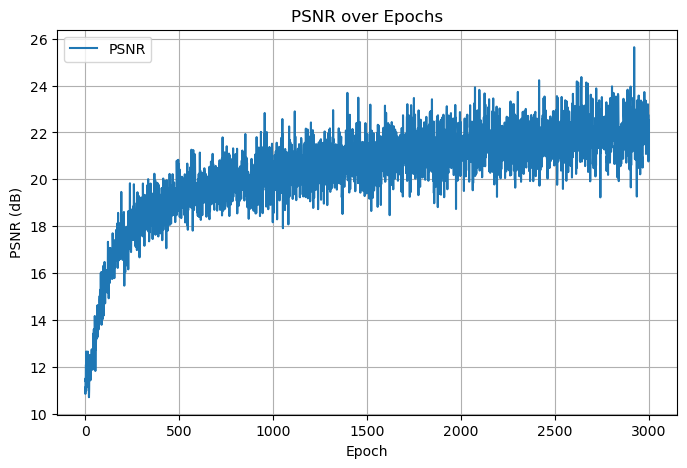

In [220]:
plt.figure(figsize=(8,5))
plt.plot(error['epoch'], error['psnr'], label='PSNR')
plt.xlabel('Epoch')
plt.ylabel('PSNR (dB)')
plt.title('PSNR over Epochs')
plt.grid(True)
plt.legend()
plt.show()

In [221]:
psnr_list = []
checkpoint_dir = Path("./nerf_lego_model")
checkpoint_files = sorted(checkpoint_dir.glob("*.pth"))
black_images = np.zeros((len(c2ws_val), H, W, 3), dtype=np.float32)
chunk_size = 1024
total_rays = H * W
batch_size = 32768
index=0

# Create output directory
output_dir = Path("./rendered_images_lego")
output_dir.mkdir(exist_ok=True)

for ckpt_idx, ckpt_path in enumerate(checkpoint_files):
    psnr_model = []
    checkpoint = torch.load(ckpt_path, map_location="mps")
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    
    # Create subdirectory for this checkpoint
    ckpt_name = ckpt_path.stem  # e.g., "checkpoint_1000"
    ckpt_output_dir = output_dir / ckpt_name
    ckpt_output_dir.mkdir(exist_ok=True)
    
    for j in range(images_val.shape[0]):
        all_rendered_colors = []
        test_data_val = RaysData(black_images, K, c2ws_val, j)
        with torch.no_grad():
            for ray_start in range(0, total_rays, chunk_size):
                ray_end = min(ray_start + chunk_size, total_rays)

                rays_o_chunk = test_data_val.rays_o[ray_start:ray_end]
                rays_d_chunk = test_data_val.rays_d[ray_start:ray_end]
                
                test_points = sample_along_rays(rays_o_chunk, rays_d_chunk)
                encoded_test_points = positional_encode_3d(test_points)
                encoded_test_direction = positional_encode_direction(rays_o_chunk)
                
                X_test_tensor = torch.from_numpy(encoded_test_points).float().to(device)
                direction_test_tensor = torch.from_numpy(encoded_test_direction).float().to(device)
                
                all_densities, all_colors = [], []
                for i in range(0, X_test_tensor.shape[0], batch_size):
                    d, c = model(X_test_tensor[i:i+batch_size], 
                                direction_test_tensor[i:i+batch_size])
                    all_densities.append(d)
                    all_colors.append(c)
                
                density = torch.cat(all_densities, dim=0)
                color = torch.cat(all_colors, dim=0)
                
                density = density.view(ray_end - ray_start, 64, 1)
                color = color.view(ray_end - ray_start, 64, 3)
                rendered_chunk = volrend(density, color, step_size)
                all_rendered_colors.append(rendered_chunk)

        rendered_colors = torch.cat(all_rendered_colors, dim=0)
        img = rendered_colors.cpu().numpy().reshape(H, W, 3)

        rmse = np.sqrt(np.mean((img - images_val[j]) **2))
        psnr_value = 10 * np.log10(1/rmse**2)
        psnr_model.append(psnr_value)
        
        # Save the rendered image
        if j == index:
            img_uint8 = (np.clip(img, 0, 1) * 255).astype(np.uint8)
            from PIL import Image
            Image.fromarray(img_uint8).save(ckpt_output_dir / f"image_{j:03d}_psnr_{psnr_value:.2f}.png")
        
        print(f"Checkpoint {ckpt_name}, Image {j}, PSNR: {psnr_value:.2f}")
        
    psnr_list.append(np.mean(psnr_model))
    print(f"Checkpoint {ckpt_name} - Mean PSNR: {psnr_list[-1]:.2f}\n")
        

Checkpoint nerf_checkpoint_epoch_1000, Image 0, PSNR: 17.95
Checkpoint nerf_checkpoint_epoch_1000, Image 1, PSNR: 13.54
Checkpoint nerf_checkpoint_epoch_1000, Image 2, PSNR: 19.07
Checkpoint nerf_checkpoint_epoch_1000, Image 3, PSNR: 20.53
Checkpoint nerf_checkpoint_epoch_1000, Image 4, PSNR: 18.25
Checkpoint nerf_checkpoint_epoch_1000, Image 5, PSNR: 16.44
Checkpoint nerf_checkpoint_epoch_1000, Image 6, PSNR: 17.19
Checkpoint nerf_checkpoint_epoch_1000, Image 7, PSNR: 16.52
Checkpoint nerf_checkpoint_epoch_1000, Image 8, PSNR: 19.54
Checkpoint nerf_checkpoint_epoch_1000, Image 9, PSNR: 19.55
Checkpoint nerf_checkpoint_epoch_1000 - Mean PSNR: 17.86

Checkpoint nerf_checkpoint_epoch_1200, Image 0, PSNR: 17.66
Checkpoint nerf_checkpoint_epoch_1200, Image 1, PSNR: 12.55
Checkpoint nerf_checkpoint_epoch_1200, Image 2, PSNR: 19.26
Checkpoint nerf_checkpoint_epoch_1200, Image 3, PSNR: 20.86
Checkpoint nerf_checkpoint_epoch_1200, Image 4, PSNR: 18.64
Checkpoint nerf_checkpoint_epoch_1200, Ima

In [ ]:
test_data_novel = RaysData(black_images, K, c2ws_test, 5)
# Process the image in ray chunks instead of all at once
chunk_size = 1024  # Process 1024 rays at a time
H, W = 200, 200
total_rays = H * W
batch_size = 32768
all_rendered_colors = []

with torch.no_grad():
    for ray_start in range(0, total_rays, chunk_size):
        ray_end = min(ray_start + chunk_size, total_rays)
        
        # Get subset of rays
        rays_o_chunk = test_data_novel.rays_o[ray_start:ray_end]
        rays_d_chunk = test_data_novel.rays_d[ray_start:ray_end]
        
        # Sample and encode
        test_points = sample_along_rays(rays_o_chunk, rays_d_chunk)
        encoded_test_points = positional_encode_3d(test_points)
        encoded_test_direction = positional_encode_direction(rays_o_chunk)
        
        X_test_tensor = torch.from_numpy(encoded_test_points).float().to(device)
        direction_test_tensor = torch.from_numpy(encoded_test_direction).float().to(device)
        
        # Process this chunk's points in batches
        all_densities, all_colors = [], []
        for i in range(0, X_test_tensor.shape[0], batch_size):
            d, c = model(X_test_tensor[i:i+batch_size], 
                        direction_test_tensor[i:i+batch_size])
            all_densities.append(d)
            all_colors.append(c)
        
        density = torch.cat(all_densities, dim=0)
        color = torch.cat(all_colors, dim=0)
        
        # Render this chunk
        density = density.view(ray_end - ray_start, 64, 1)
        color = color.view(ray_end - ray_start, 64, 3)
        rendered_chunk = volrend(density, color, step_size)
        all_rendered_colors.append(rendered_chunk)

# Combine all chunks
rendered_colors = torch.cat(all_rendered_colors, dim=0)
img = rendered_colors.cpu().numpy().reshape(H, W, 3)

In [173]:

test_data_novel = RaysData(black_images, K, c2ws_val, 5)

test_points = sample_along_rays(test_data_novel.rays_o, test_data_novel.rays_d)
    #print("test_points shape", test_points.shape)

encoded_test_points = positional_encode_3d(test_points)
    #print("test points shape", encoded_test_points.shape)
encoded_test_direction = positional_encode_direction(test_data_novel.rays_o)
    #print("test direction shape", encoded_test_direction.shape)

X_test_tensor = torch.from_numpy(encoded_test_points).float().to(device)
direction_test_tensor = torch.from_numpy(encoded_test_direction).float().to(device)

batch_size = 32768
all_densities, all_colors = [], []

with torch.no_grad():
    for i in range(0, X_test_tensor.shape[0], batch_size):
        d, c = model(X_test_tensor[i:i+batch_size], direction_test_tensor[i:i+batch_size])
        all_densities.append(d)
        all_colors.append(c)

density = torch.cat(all_densities, dim=0)
color = torch.cat(all_colors, dim=0)

density = density.view(40000, 64, 1)
color = color.view(40000, 64, 3)

rendered_colors = volrend(density, color, step_size)
rendered_colors_np = rendered_colors.cpu().numpy()
img = rendered_colors_np.reshape(H, W, 3)

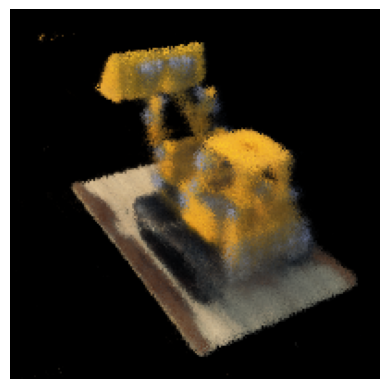

In [188]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:


volrend(sigmas, rgbs, step_size)